In [1]:
#import necessary libraries when needed
import os
import numpy as np
import pandas as pd
import pathlib
import imageio

Now , We jump to get insight of the dataset. Dataset has three folders (train , val ,test).

In [2]:
# Exploring dataset 
base_dir = '../input/chest-xray-pneumonia/chest_xray/'

train_pneumonia_dir = base_dir+'train/PNEUMONIA/'
train_normal_dir=base_dir+'train/NORMAL/'

test_pneumonia_dir = base_dir+'test/PNEUMONIA/'
test_normal_dir = base_dir+'test/NORMAL/'

val_normal_dir= base_dir+'val/NORMAL/'
val_pnrumonia_dir= base_dir+'val/PNEUMONIA/'

train_pn = [train_pneumonia_dir+"{}".format(i) for i in os.listdir(train_pneumonia_dir) ]
train_normal = [train_normal_dir+"{}".format(i) for i in os.listdir(train_normal_dir) ]

test_normal = [test_normal_dir+"{}".format(i) for i in os.listdir(test_normal_dir)]
test_pn = [test_pneumonia_dir+"{}".format(i) for i in os.listdir(test_pneumonia_dir)]

val_pn= [val_pnrumonia_dir+"{}".format(i) for i in os.listdir(val_pnrumonia_dir) ]
val_normal= [val_normal_dir+"{}".format(i) for i in os.listdir(val_normal_dir) ]

print ("Total images:",len(train_pn+train_normal+test_normal+test_pn+val_pn+val_normal))
print ("Total pneumonia images:",len(train_pn+test_pn+val_pn))
print ("Total Nomral images:",len(train_normal+test_normal+val_normal))

Total images: 5856
Total pneumonia images: 4273
Total Nomral images: 1583


#### Dataset Preprocessing & Visualization
The dataset is small. So, We follow 80%, 15%, 5% split. Besides, dataset is clearly imbalanced. We will take care of it later.

In [3]:
# Dataset Splitting (train 80% , test 15% and validation 5% )

# Gathering all pneumina and normal chest X-ray in two python list
pn = train_pn + test_pn + val_pn
normal = train_normal + test_normal + val_normal

# Spliting dataset in train set,test set and validation set.

train_imgs = pn[:3418]+ normal[:1224]  # 80% of 4273 Pneumonia and normal chest X-ray are 3418 and 1224 respectively.
test_imgs = pn[3418:4059]+ normal[1224:1502]
val_imgs = pn[4059:] + normal[1502:]

print("Total Train Images %s containing %s pneumonia and %s normal images" 
      % (len(train_imgs),len(pn[:3418]),len(normal[:1224])))
print("Total Test Images %s containing %s pneumonia and %s normal images"
      % (len(test_imgs),len(pn[3418:4059]),len(normal[1224:1502])))
print("Total validation Images %s containing %s pneumonia and %s normal images" 
      % (len(val_imgs),len(pn[4059:]),len(normal[1502:])))



import random

random.shuffle(train_imgs)
random.shuffle(test_imgs)
random.shuffle(val_imgs)

Total Train Images 4642 containing 3418 pneumonia and 1224 normal images
Total Test Images 919 containing 641 pneumonia and 278 normal images
Total validation Images 295 containing 214 pneumonia and 81 normal images


In [5]:
#showing a file name from test set
print(test_imgs[5])

../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0083-0001.jpeg


#### Loading each image and their label into array

In [4]:
import cv2
img_size = 224

def preprocess_image(image_list):
    
    X = [] # images
    y = [] #labels (0 for Normal or 1 for Pneumonia)
    count=0
    
    for image in image_list:
        
        try:

            img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
            
            img=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_CUBIC)
            
            #convert image to 2D to 3D 
            img = np.dstack([img, img, img])
            
            #convrt greyscale image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Normalalize Image
            img = img.astype(np.float32)/255.
            
            count=count+1

            X.append(img) 
            
            
        except:
            continue
        #get the labels 
        if 'NORMAL' in image:
            y.append(0)
            
        elif 'IM' in image:
            y.append(0)
            
        elif 'virus' or 'bacteria' in image:
            y.append(1)
            
    
    return X, y

In [6]:
X, y = preprocess_image(train_imgs)

In [7]:
# Check all the images getting labels or not
arr=y	
uniqueValues, occurCount = np.unique(arr, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [1224 3418]


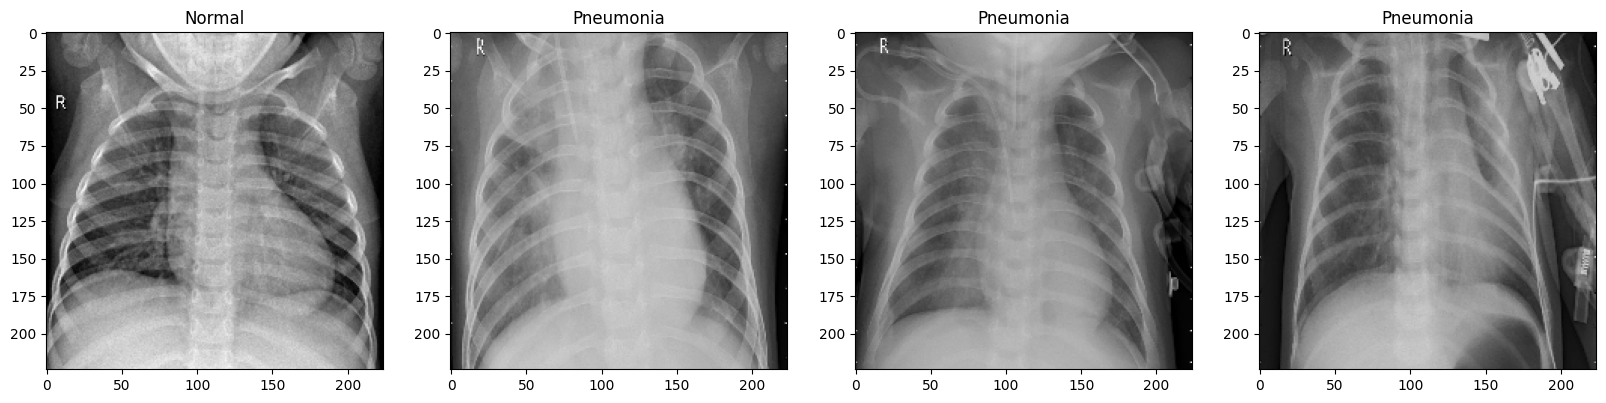

In [8]:
# Display some images from train set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (y[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(X[i])
    k=k+1;

In [9]:
# get the labels for test set

P, t = preprocess_image(test_imgs)

In [10]:
arr=t	
uniqueValues, occurCount = np.unique(arr, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [278 641]


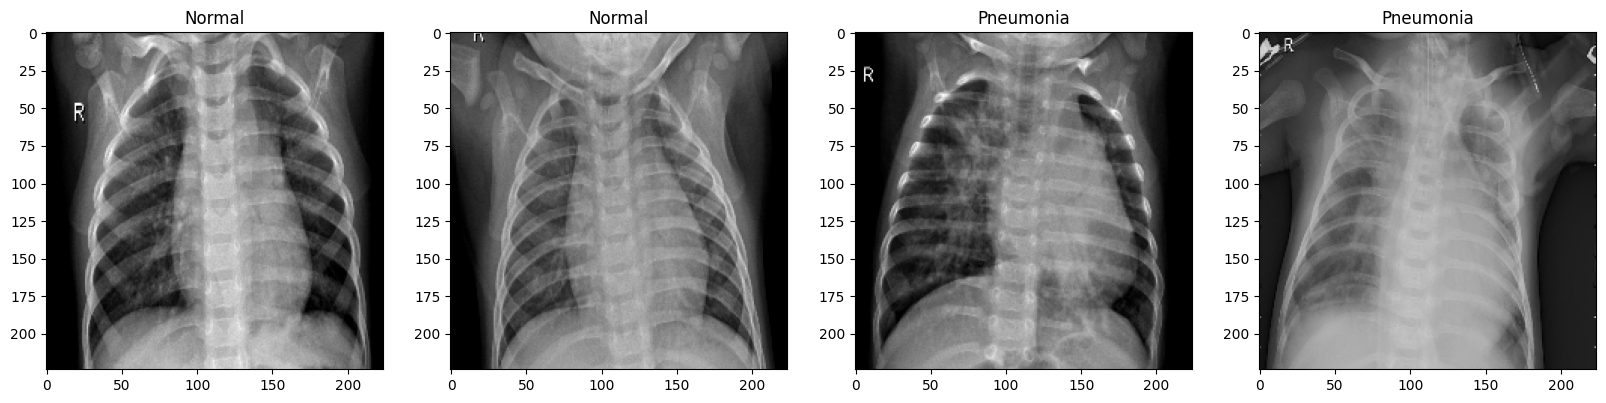

In [11]:
# now displaying some images from test set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (t[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(P[i])
    k=k+1;

In [12]:
# get the labels for validation set

K, m = preprocess_image(val_imgs)

In [13]:
arr=m

 
# Get a tuple of unique values & their frequency in numpy array
uniqueValues, occurCount = np.unique(arr, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [ 81 214]


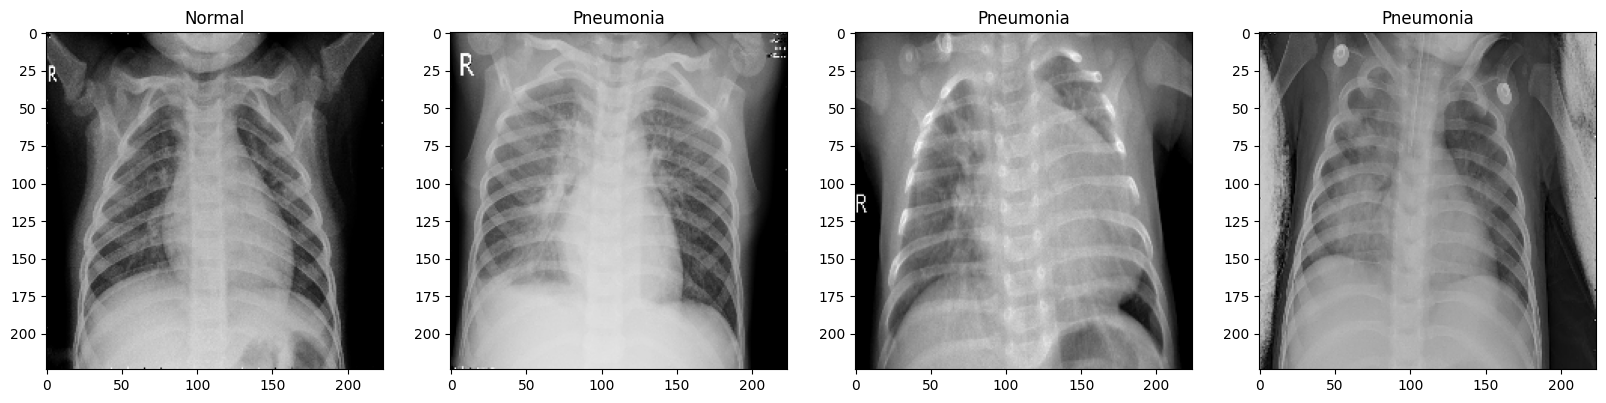

In [14]:
# now displaying some images from validation set
# Feel free to show more image by changing the values

import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(20, 5))
k=1
for i in range(4):
    a = fig.add_subplot(1, 4, k)
    if (m[i]==0):
        a.set_title('Normal')
    else:
        a.set_title('Pneumonia')
        
    plt.imshow(K[i])
    k=k+1;

#### Let's count and show the quantity of image in each set by counplot from Seaborn

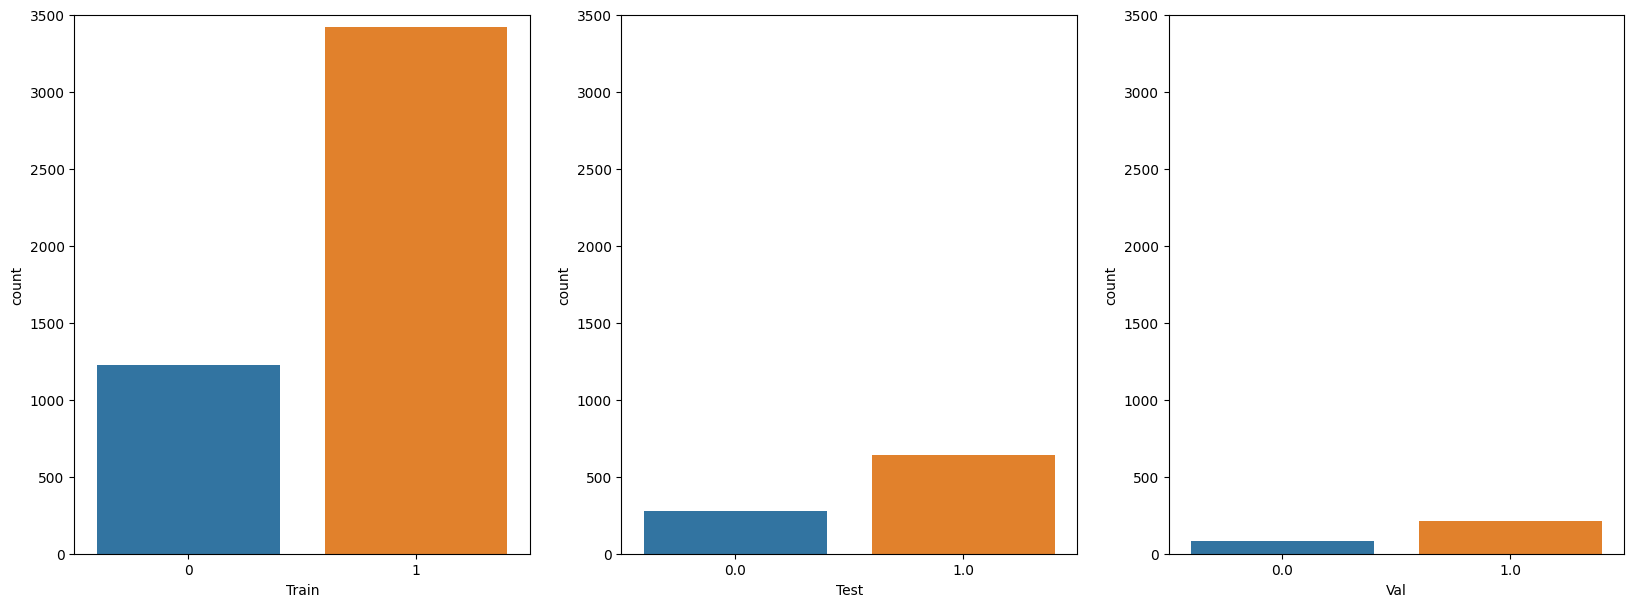

In [16]:
import seaborn as sns


df=pd.DataFrame()
df['Train']=y
df['Test']=pd.Series(t)
df['Val']=pd.Series(m)

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

sns.countplot(data=df, x='Train', ax=ax[0])
ax[0].set(ylim=(0, 3500))

sns.countplot(data=df, x='Test', ax=ax[1])
ax[1].set(ylim=(0, 3500))

sns.countplot(data=df, x='Val', ax=ax[2])
ax[2].set(ylim=(0, 3500))

plt.show()

#### Dealing with class imbalance
We can solve the class imbalance problem with several methods. One of the simplest ways to solve the class imbalance is to simply provide a weight for each class which places more emphasis on the minority classes so CNN model can learn equally from all classes. Here, we employ sklearn compute class weight function to set weight for each class.

In [18]:
from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes= np.unique(y), y=y)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 1.8962418300653594, 1: 0.679052077238151}


In [19]:
import seaborn as sns
import gc

train_imgs = train_pn[:3875]+ train_normal[:1341]
del train_imgs
gc.collect()

X_train = np.array(X)
y_train = np.array(y)
X_test = np.array(P)
y_test = np.array(t)
X_val = np.array(K)
y_val = np.array(m)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(4642, 224, 224, 3)
(4642,)
(919, 224, 224, 3)
(919,)
(295, 224, 224, 3)
(295,)


## Training

#### We can say that training phase starts from here. We will use a batch size of 32. Batch size should be a power of 2 (4, 8, 16, 32, 64, 128, 256,....). The batch size 32 means the model will train 32 training samples and then update its parameters once. Batch training is faster and memory efficient.

In [20]:
# clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

batch_size = 32

## Image Augmentation
Lets build an input pipline for model with the augmentation technique. We artificially increase the dataset with augmentation technique, since we are using a small dataset. It also helps prevent overfitting. Feel free to study various augmentation techniques in internet.

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(  rotation_range=7,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     shear_range=0.2,
                                     zoom_range=0.45,
                                     horizontal_flip=True)
                                   
val_datagen = ImageDataGenerator(zoom_range=0.45)  

In [22]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [23]:
# Set image Size
img_size =224

## Train full train set with MobileNet
We don't build a convolutional neural network (CNN) architecture from scratch here. Instead, we use a pretrainted CNN architecture called MobileNet.

In [26]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import *
from keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from keras import backend as K

# Create the base pre-trained model
# Weights should be none becuase we don't need to train with any pre-trained weights here

base_model = MobileNet(weights=None, include_top=False,input_shape=(img_size, img_size, 3))

x = base_model.output

# Add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# Add a logistic layer
predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# Compile model
model.compile(optimizer='adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])

In [27]:
# We can see details of  MobileNet architecure's details
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [28]:
# We train for 64 epochs 
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size,
                              class_weight =class_weights,
)

/tmp/ipykernel_32/2085736022.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/64
145/145 [==============================] - 69s 317ms/step - loss: 0.3748 - binary_accuracy: 0.8275 - mae: 0.2154 - val_loss: 1.0209 - val_binary_accuracy: 0.7326 - val_mae: 0.2783
Epoch 2/64
145/145 [==============================] - 47s 321ms/step - loss: 0.2905 - binary_accuracy: 0.8764 - mae: 0.1637 - val_loss: 1.2323 - val_binary_accuracy: 0.7292 - val_mae: 0.2758
Epoch 3/64
145/145 [==============================] - 47s 321ms/step - loss: 0.2648 - binary_accuracy: 0.8859 - mae: 0.1514 - val_loss: 1.4695 - val_binary_accuracy: 0.7257 - val_mae: 0.2765
Epoch 4/64
145/145 [==============================] - 46s 320ms/step - loss: 0.2536 - binary_accuracy: 0.8931 - mae: 0.1481 - val_loss: 3.9229 - val_binary_accuracy: 0.7292 - val_mae: 0.2708
Epoch 5/64
145/145 [==============================] - 46s 320ms/step - loss: 0.2256 - binary_accuracy: 0.9030 - mae: 0.1305 - val_loss: 1.7181 - val_binary_accuracy: 0.7222 - val_mae: 0.2736
Epoch 6/64
145/145 [=========================

#### Plot how validation accuracy and loss are increasing against training accuracy and loss.

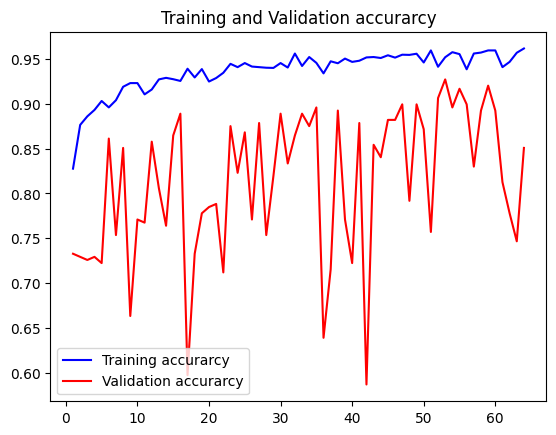

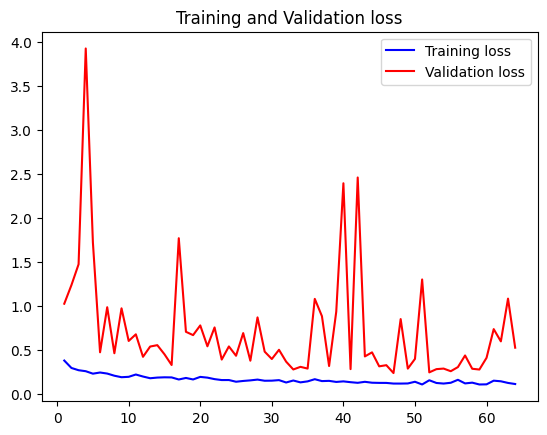

In [29]:
# Lets plot the train and val curve
# Get the details form the history object
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

## Estimation of classification performance / Result
We will check our model classification ability using some evaluation matrices. It is very important to use multiple evaluation metrics to evaluate your model to ensure that the model is operating correctly and optimally. We will check our model's performance by Accuracy, Recall, Precision, F1 and AUC score. Feel free to search in google to know more about these matrices.

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(X_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\n============TEST METRICS=============')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((history.history['binary_accuracy'][-1])*100, 2)))

29/29 [==============================] - 1s 32ms/step
CONFUSION MATRIX ------------------
[[242  36]
 [ 37 604]]

============TEST METRICS=============
Accuracy: 92.05658324265505%
Precision: 94.375%
Recall: 94.22776911076443%
F1-score: 94.30132708821233

TRAIN METRIC ----------------------
Train acc: 96.16


<Axes: >

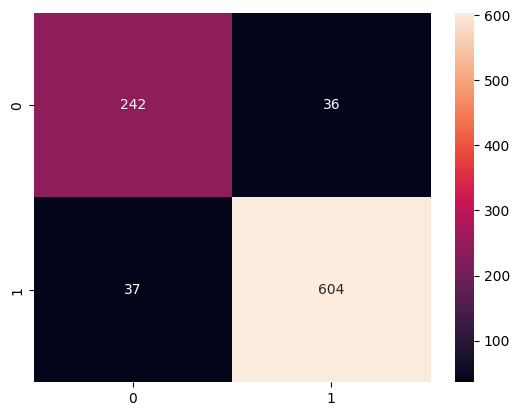

In [31]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d",)


#### The ROC (receiver operating characteristic) curve indicates the diagnostic accuracy and porformance of a model. We show the ROC curve and also calculate AUC score.

AUC Score: 0.9752971413820581


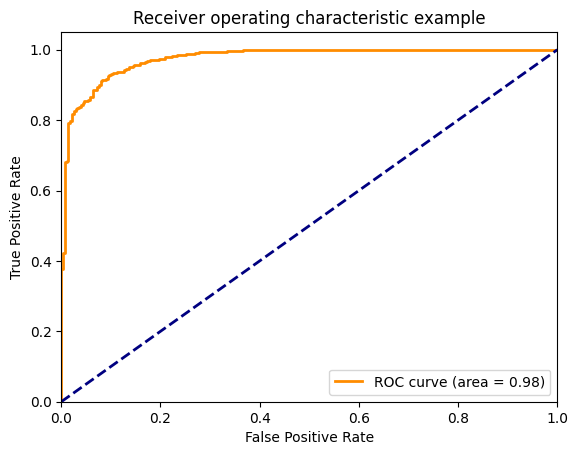

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

fpr , tpr , thresholds = roc_curve ( y_test , preds)
auc_keras = auc(fpr, tpr)
print("AUC Score:",auc_keras)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

We see the model achieves great evaluation scores. It indicates that our model performs very well. 